## Movie Studio  Data Analysis

- Student name: Olaide Kashimawo
- Student pace: self paced
- Scheduled project review date/time: Mon, July 20, 2022
- Instructor name:Morgan Jones
- Blog post URL: TBD

# 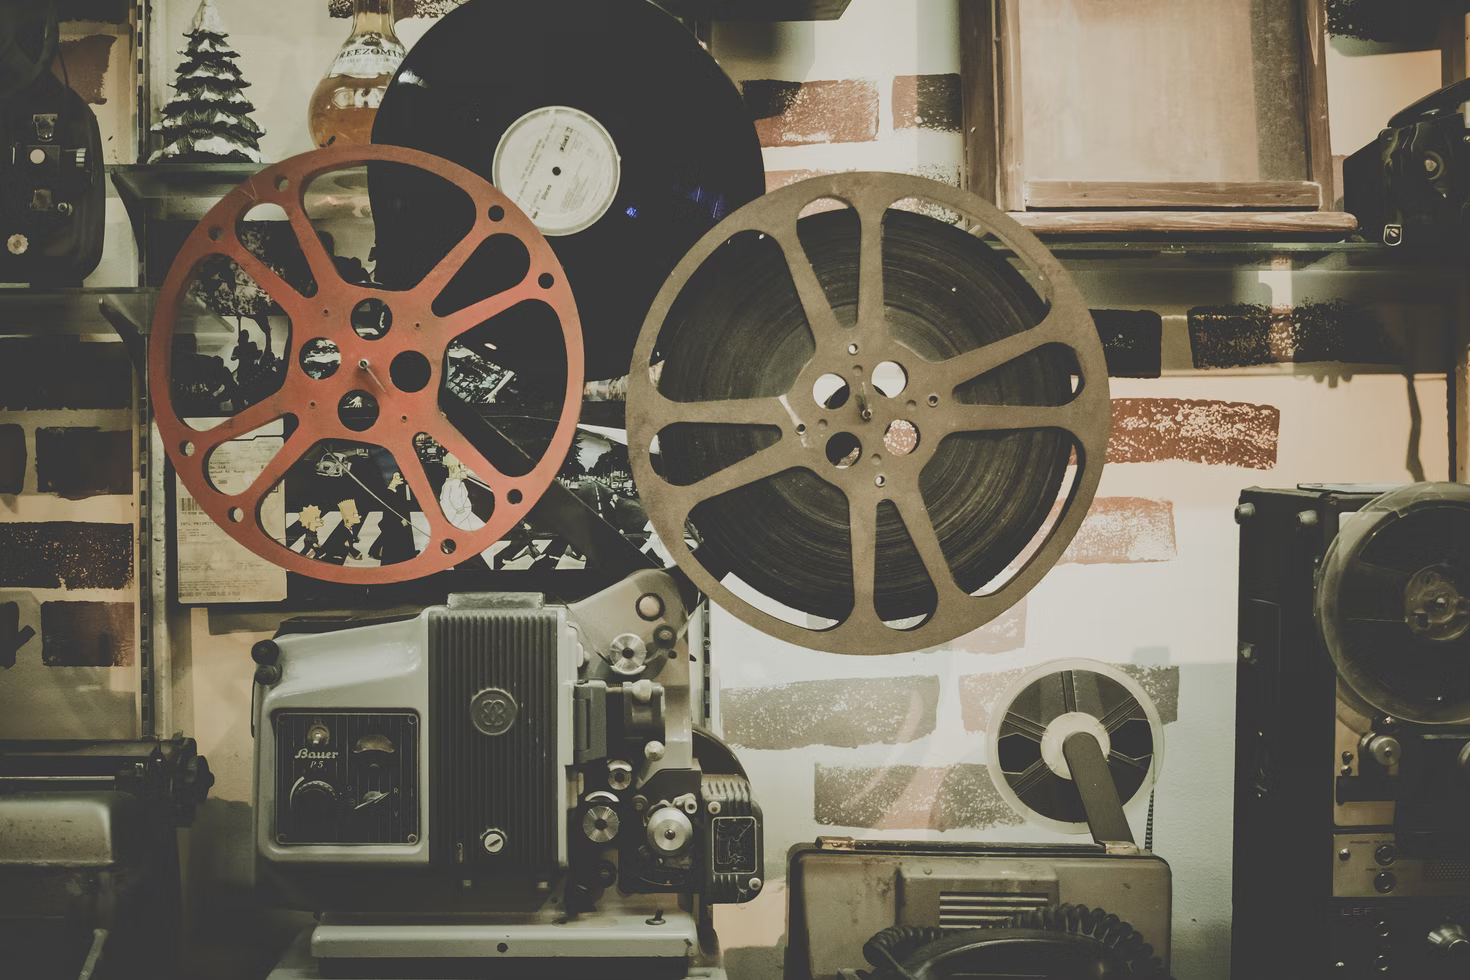

## Overview

 **Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office.
 Microsoft already has a large market share but it can still grow exponentially; ratings and genre, as well as the return on investment in the industry, will determine if the company can proceed**


## Business understanding


**I will be sifting through movie dataset in order to discover various relationships between variables such as production budget, domestic gross ,worldwide gross, total gross and profitability** 


## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import operator
%matplotlib inline

##  Data Files

In [2]:
df_bom_gross =pd.read_csv('data/bom.movie_gross.csv.gz')
df_ratings = pd.read_csv("data/imdb.title.ratings.tsv.gz",sep='\t')
df_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
df_movie_budget = pd.read_csv('data/tn.movie_budgets.csv.gz')

## From this project I imported the following data files
- df_movie_budget: which consist of 6 columns (id, release date, movie, production budget domestic gross, worldwide gross) 5781rows
- df_bom_gross: which consist of 5 columns (title, studio, production budget domestic gross, foreign gross) 3386 rows
- df_ratings: which consist of 3 columns (tconst, averagerating numVotes,) 1244078 rows
- df_basics:  6 columns (tconst, primary title, original title, start year, runtime minute, genres) 146143 rows

## Here are the steps we'll be taking:
  In this step, I gathered data, a csv spreadsheet, then load it into
a dataframe to assess its quality. I will be looking for missing value and problems in
quality and/or structure. We will be removing extraneous data and making modifications, such
as replacing information and removing duplicates, to ensure our dataset is trim and clean for
analysis.


In [3]:
df_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
df_bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244079 entries, 0 to 1244078
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1244079 non-null  object 
 1   averageRating  1244079 non-null  float64
 2   numVotes       1244079 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.5+ MB


In [6]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


# Explore Data files
- This to display the first 5 rows of the various dataset(head and tail)

In [7]:
df_bom_gross.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
df_bom_gross.tail(5)

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [9]:
#check any missing values
print ("Are there missing values? :",df_bom_gross.isnull().values.any())

Are there missing values? : True


In [10]:
df_bom_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
# To drop any missing values
df_bom_gross.dropna(axis = 0)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [12]:
# To check for any duplicated values
dup_df_bom_gross = df_bom_gross.duplicated().any()

In [13]:
print ("Are there duplicate values? :",dup_df_bom_gross)

Are there duplicate values? : False


In [14]:
df_movie_budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
df_movie_budget.tail(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [16]:
#check any missing values
print ("Are there missing values? :",df_movie_budget.isnull().values.any())

Are there missing values? : False


In [17]:
# To check for any duplicated values
dup_df_movie_budget= df_movie_budget.duplicated().any()

In [18]:
print ("Are there duplicate values? :",dup_df_movie_budget)

Are there duplicate values? : False


In [19]:
#To drop columns
df_movie_budget.drop(['id','release_date','movie','domestic_gross','worldwide_gross'],axis=1)

,production_budget
0,"$425,000,000"
1,"$410,600,000"
2,"$350,000,000"
3,"$330,600,000"
4,"$317,000,000"
...,...
5777,"$7,000"
5778,"$6,000"
5779,"$5,000"
5780,"$1,400"


## IMDB data
- This to display the first 5 rows of the IMDB dataset(head and tail),checking missing values, check for duplicate and drop null values. This dataset contains tconst,primary_title,original_title,start_year,runtime_minutes,genres from 2010 to 2019

In [20]:
df_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [21]:
df_basics.tail(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [22]:
#check any missing values
print ("Are there missing values? :",df_basics.isnull().values.any())

Are there missing values? : True


In [23]:
# To drop any missing values
df_basics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [24]:
# To check for any duplicated values
dup_df_basics = df_basics.duplicated().any()

In [25]:
print ("Are there duplicate values? :",dup_df_basics)

Are there duplicate values? : False


In [26]:
df_ratings.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1879
1,tt0000002,5.9,248
2,tt0000003,6.5,1653
3,tt0000004,5.8,161
4,tt0000005,6.2,2479


In [27]:
df_ratings.tail(5)

,tconst,averageRating,numVotes
1244074,tt9916690,6.5,6
1244075,tt9916720,5.2,210
1244076,tt9916730,8.7,6
1244077,tt9916766,6.7,19
1244078,tt9916778,7.2,34


In [28]:
#check any missing values
print ("Are there missing values? :",df_ratings.isnull().values.any())

Are there missing values? : False


In [29]:
# To check for any duplicated values
dup_df_ratings= df_ratings.duplicated().any()

In [30]:
print ("Are there duplicate values? :",dup_df_ratings)


Are there duplicate values? : False


## Merge the IMDB dataset
 - Merging the basics and ratings dataframes, checked missing values, check for duplicate and drop null values. 


In [31]:
#Merging the two data frames 
df_merge = pd.merge(df_basics,df_ratings, on="tconst")
df_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averageRating,numVotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",6.7,112
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,122
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.7,7221
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.0,19
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.4,331
...,...,...,...,...,...,...,...,...
84990,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,6.7,6
84991,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",3.6,233
84992,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",3.6,15
84993,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,8.3,6


In [32]:
#droping tconst','runtime_minutes
df_merge.drop(['tconst','runtime_minutes'],axis=1)

,primary_title,original_title,start_year,genres,averageRating,numVotes
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",6.7,112
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,122
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.7,7221
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.0,19
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.4,331
...,...,...,...,...,...,...
84990,The Rehearsal,O Ensaio,2019,Drama,6.7,6
84991,Safeguard,Safeguard,2019,"Drama,Thriller",3.6,233
84992,The Secret of China,The Secret of China,2019,"Adventure,History,War",3.6,15
84993,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama,8.3,6


In [33]:
df_merge['title'] = df_merge['primary_title']
df_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averageRating,numVotes,title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",6.7,112,Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,122,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.7,7221,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.0,19,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.4,331,The Wandering Soap Opera
...,...,...,...,...,...,...,...,...,...
84990,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,6.7,6,The Rehearsal
84991,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",3.6,233,Safeguard
84992,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",3.6,15,The Secret of China
84993,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,8.3,6,Kuambil Lagi Hatiku


In [34]:
df_merge.drop(['tconst'], axis=1)

,primary_title,original_title,start_year,runtime_minutes,genres,averageRating,numVotes,title
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",6.7,112,Sunghursh
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,122,One Day Before the Rainy Season
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.7,7221,The Other Side of the Wind
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.0,19,Sabse Bada Sukh
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.4,331,The Wandering Soap Opera
...,...,...,...,...,...,...,...,...
84990,The Rehearsal,O Ensaio,2019,51.0,Drama,6.7,6,The Rehearsal
84991,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",3.6,233,Safeguard
84992,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",3.6,15,The Secret of China
84993,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,8.3,6,Kuambil Lagi Hatiku


In [35]:
#merging the BOM and the IMDB dataset
df_merge = pd.merge(df_merge,df_bom_gross, on='title', how='inner')
df_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averageRating,numVotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,18872,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.0,41597,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,5.7,12,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.9,211,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,311974,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.0,1742,The Chambermaid,FM,300.0,NaN,2015
3077,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.4,1032,How Long Will I Love U,WGUSA,747000.0,82100000,2018
3078,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,1143,Helicopter Eela,Eros,72000.0,NaN,2018
3079,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.5,670,Last Letter,CL,181000.0,NaN,2018


In [36]:
# To check for any duplicated values
dup_df_merge = df_merge.duplicated().any()

In [37]:
print ("Are there duplicate values? :",dup_df_merge)

Are there duplicate values? : False


In [38]:
#merge the movie budget
df_merge = pd.merge(df_merge, df_movie_budget, left_index=True,right_index=True)
df_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averageRating,numVotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,18872,Wazir,Relbig.,1100000.0,NaN,2016,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.0,41597,On the Road,IFC,744000.0,8000000,2012,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,5.7,12,On the Road,IFC,744000.0,8000000,2012,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.9,211,On the Road,IFC,744000.0,8000000,2012,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,311974,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.0,1742,The Chambermaid,FM,300.0,NaN,2015,77,"Jun 26, 2009",The Hurt Locker,"$15,000,000","$17,017,811","$49,894,223"
3077,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.4,1032,How Long Will I Love U,WGUSA,747000.0,82100000,2018,78,"Jan 28, 2000",Eye of the Beholder,"$15,000,000","$16,500,786","$18,260,865"
3078,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,1143,Helicopter Eela,Eros,72000.0,NaN,2018,79,"Nov 2, 2012",The Man with the Iron Fists,"$15,000,000","$15,634,090","$22,018,988"
3079,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.5,670,Last Letter,CL,181000.0,NaN,2018,80,"May 11, 1984",Firestarter,"$15,000,000","$15,136,870","$15,136,870"


In [39]:
df_merge['primary_title']=df_merge['movie']
df_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averageRating,numVotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0315642,Avatar,Wazir,2016,103.0,"Action,Crime,Drama",7.1,18872,Wazir,Relbig.,1100000.0,NaN,2016,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,tt0337692,Pirates of the Caribbean: On Stranger Tides,On the Road,2012,124.0,"Adventure,Drama,Romance",6.0,41597,On the Road,IFC,744000.0,8000000,2012,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,tt4339118,Dark Phoenix,On the Road,2014,89.0,Drama,5.7,12,On the Road,IFC,744000.0,8000000,2012,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,tt5647250,Avengers: Age of Ultron,On the Road,2016,121.0,Drama,5.9,211,On the Road,IFC,744000.0,8000000,2012,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,tt0359950,Star Wars Ep. VIII: The Last Jedi,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,311974,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,tt8331988,The Hurt Locker,La camarista,2018,102.0,Drama,7.0,1742,The Chambermaid,FM,300.0,NaN,2015,77,"Jun 26, 2009",The Hurt Locker,"$15,000,000","$17,017,811","$49,894,223"
3077,tt8404272,Eye of the Beholder,Chao shi kong tong ju,2018,101.0,Romance,6.4,1032,How Long Will I Love U,WGUSA,747000.0,82100000,2018,78,"Jan 28, 2000",Eye of the Beholder,"$15,000,000","$16,500,786","$18,260,865"
3078,tt8427036,The Man with the Iron Fists,Helicopter Eela,2018,135.0,Drama,5.4,1143,Helicopter Eela,Eros,72000.0,NaN,2018,79,"Nov 2, 2012",The Man with the Iron Fists,"$15,000,000","$15,634,090","$22,018,988"
3079,tt9078374,Firestarter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.5,670,Last Letter,CL,181000.0,NaN,2018,80,"May 11, 1984",Firestarter,"$15,000,000","$15,136,870","$15,136,870"


In [40]:
#drop column
df_merge = df_merge.drop(['tconst', 'original_title','movie','start_year','id',], axis=1)
df_merge.sample(5)

,primary_title,runtime_minutes,genres,averageRating,numVotes,title,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross
2215,Kiss of the Dragon,108.0,"Adventure,Animation,Comedy",8.0,481657,Zootopia,BV,341300000.0,682500000,2016,"Jul 6, 2001","$25,000,000","$36,833,473","$36,833,473"
1795,Source Code,115.0,"Drama,Family,Sport",6.6,16014,When the Game Stands Tall,TriS,30100000.0,NaN,2014,"Apr 1, 2011","$32,000,000","$54,712,227","$140,428,499"
844,300,93.0,"Drama,Romance,Sci-Fi",6.6,492,One Day,Focus,13800000.0,45500000,2011,"Mar 9, 2007","$60,000,000","$210,614,939","$454,161,935"
1240,Mary Reilly,102.0,"Drama,Thriller",6.9,1111,You Will Be My Son,Cohen,285000.0,3600000,2013,"Feb 23, 1996","$47,000,000","$5,707,094","$12,900,000"
1159,Striptease,87.0,"Crime,Documentary",7.0,6967,Tabloid,IFC,697000.0,NaN,2011,"Jun 28, 1996","$50,000,000","$33,109,743","$113,309,743"


In [41]:
#drop column
df_merge = df_merge.drop(['studio', 'title', 'release_date','runtime_minutes','domestic_gross_y','foreign_gross'], axis=1)
df_merge.head(5)

,primary_title,genres,averageRating,numVotes,domestic_gross_x,year,production_budget,worldwide_gross
0,Avatar,"Action,Crime,Drama",7.1,18872,1100000.0,2016,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"Adventure,Drama,Romance",6.0,41597,744000.0,2012,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,Drama,5.7,12,744000.0,2012,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,Drama,5.9,211,744000.0,2012,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"Adventure,Comedy,Drama",7.3,311974,58200000.0,2013,"$317,000,000","$1,316,721,747"


Rename the columns primary_title,domestic_gross_x

In [42]:
#Renaming dataframe 
df_merge.rename({'primary_title':'title','domestic_gross_x':'domestic_gross'}, axis=1, inplace =True)
df_merge

,title,genres,averageRating,numVotes,domestic_gross,year,production_budget,worldwide_gross
0,Avatar,"Action,Crime,Drama",7.1,18872,1100000.0,2016,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"Adventure,Drama,Romance",6.0,41597,744000.0,2012,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,Drama,5.7,12,744000.0,2012,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,Drama,5.9,211,744000.0,2012,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"Adventure,Comedy,Drama",7.3,311974,58200000.0,2013,"$317,000,000","$1,316,721,747"
...,...,...,...,...,...,...,...,...
3076,The Hurt Locker,Drama,7.0,1742,300.0,2015,"$15,000,000","$49,894,223"
3077,Eye of the Beholder,Romance,6.4,1032,747000.0,2018,"$15,000,000","$18,260,865"
3078,The Man with the Iron Fists,Drama,5.4,1143,72000.0,2018,"$15,000,000","$22,018,988"
3079,Firestarter,"Drama,Romance",6.5,670,181000.0,2018,"$15,000,000","$15,136,870"


In [43]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 0 to 3080
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3081 non-null   object 
 1   genres             3069 non-null   object 
 2   averageRating      3081 non-null   float64
 3   numVotes           3081 non-null   int64  
 4   domestic_gross     3059 non-null   float64
 5   year               3081 non-null   int64  
 6   production_budget  3081 non-null   object 
 7   worldwide_gross    3081 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 216.6+ KB


In [44]:
#check any missing values
print ("Are there missing values? :",df_merge.isnull().values.any())

Are there missing values? : True


In [45]:
# To find any missing values
df_merge.isna().sum()

title                 0
genres               12
averageRating         0
numVotes              0
domestic_gross       22
year                  0
production_budget     0
worldwide_gross       0
dtype: int64

In [46]:
# To check for any duplicated values
dup_df_merge= df_ratings.duplicated().any()

In [47]:
print ("Are there duplicate values? :",dup_df_merge)

Are there duplicate values? : False


In [48]:
df_merge.dropna(axis=0, how='any', inplace=True)

In [49]:
df_merge.isnull()

,title,genres,averageRating,numVotes,domestic_gross,year,production_budget,worldwide_gross
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3076,False,False,False,False,False,False,False,False
3077,False,False,False,False,False,False,False,False
3078,False,False,False,False,False,False,False,False
3079,False,False,False,False,False,False,False,False


## Merge Dataframe 

In [50]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3080
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3047 non-null   object 
 1   genres             3047 non-null   object 
 2   averageRating      3047 non-null   float64
 3   numVotes           3047 non-null   int64  
 4   domestic_gross     3047 non-null   float64
 5   year               3047 non-null   int64  
 6   production_budget  3047 non-null   object 
 7   worldwide_gross    3047 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 214.2+ KB


## Data Cleaning

### After loading the datasets, I make the following changes!
- Displayed the first 5 rows of the dataset(head and tail),checking missing values, check for duplicate and drop null values. 
- This data contains title, studio,domestic_gross,foreign_gross and year from 2010 to 2019
- Drop the values which carry "NaN" values, they do not contain any useful information.Drop a duplicate value.
- Merged it the IMDB dataset
- Rename the date frames
- Dataset include now  8 columns , 3081 rows(past 5782 row)


## Changing column types to (float)
Production_budget and Worldwide_gross were in a string data type and was change to analysis the gross and budget

In [51]:
df_merge['production_budget'] = df_merge['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)


In [52]:
df_merge['worldwide_gross'] = df_merge['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)


In [53]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3080
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3047 non-null   object 
 1   genres             3047 non-null   object 
 2   averageRating      3047 non-null   float64
 3   numVotes           3047 non-null   int64  
 4   domestic_gross     3047 non-null   float64
 5   year               3047 non-null   int64  
 6   production_budget  3047 non-null   float64
 7   worldwide_gross    3047 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 214.2+ KB


In [54]:
df_merge.describe()

,averageRating,numVotes,domestic_gross,year,production_budget,worldwide_gross
count,3047.000000,3.047000e+03,3.047000e+03,3047.000000,3.047000e+03,3.047000e+03
mean,6.412176,7.523252e+04,3.034401e+07,2014.079751,5.425375e+07,1.526811e+08
std,1.016983,1.544500e+05,6.635334e+07,2.444366,4.634777e+07,2.166792e+08
min,1.600000,5.000000e+00,1.000000e+02,2010.000000,1.500000e+07,0.000000e+00
25%,5.900000,2.623000e+03,1.380000e+05,2012.000000,2.500000e+07,3.015135e+07
50%,6.500000,1.571600e+04,1.900000e+06,2014.000000,3.900000e+07,7.641675e+07
75%,7.100000,7.708950e+04,3.220000e+07,2016.000000,6.500000e+07,1.811195e+08
max,9.500000,2.269222e+06,7.001000e+08,2018.000000,4.250000e+08,2.776345e+09


# Exploratory Data Analysis

### Find the total gross of by adding the domestic_gross and worldwide_gross.

In [55]:
df_merge['total_gross'] = df_merge['domestic_gross'] + df_merge['worldwide_gross']
df_merge['total_gross']

0       2.777445e+09
1       1.046408e+09
2       1.505064e+08
3       1.403758e+09
4       1.374922e+09
            ...     
3076    4.989452e+07
3077    1.900786e+07
3078    2.209099e+07
3079    1.531787e+07
3080    1.956230e+07
Name: total_gross, Length: 3047, dtype: float64

In [56]:
df_merge['total_gross'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3076    False
3077    False
3078    False
3079    False
3080    False
Name: total_gross, Length: 3047, dtype: bool

## Statistical Findings

- Which year had the highest number of Voting?
- Which year had the highest production budget?
- Which year had the top rated movies by year?
- Which year had most profit?
- How ratings affect genre?

## Which year had the highest number of Votes?

In [57]:
df_merge.columns

Index(['title', 'genres', 'averageRating', 'numVotes', 'domestic_gross',
       'year', 'production_budget', 'worldwide_gross', 'total_gross'],
      dtype='object')

In [58]:
#years with higtest number of votes
df_merge.groupby('year')['numVotes']. mean().sort_values(ascending=False)

year
2010    107629.435146
2013     94518.517241
2012     86780.264624
2014     81173.578348
2011     78775.131285
2017     63672.251553
2016     60585.293532
2015     60236.379808
2018     55498.306050
Name: numVotes, dtype: float64

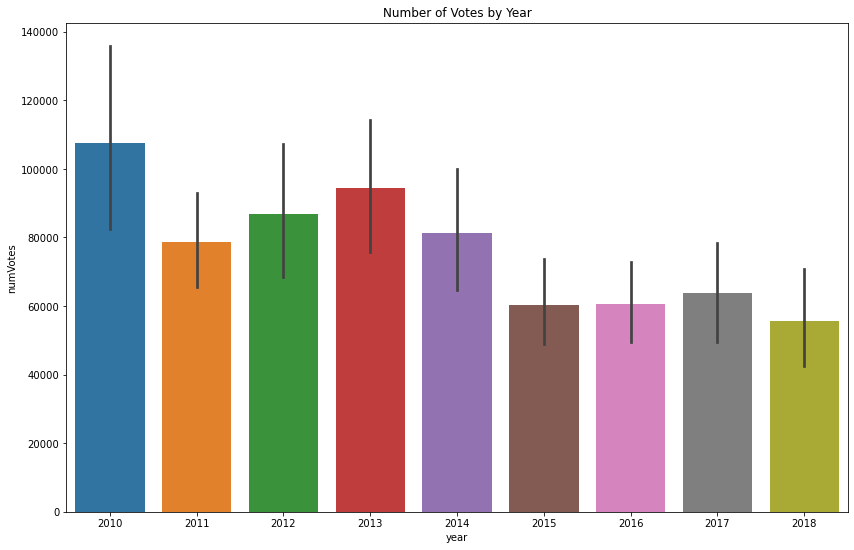

In [59]:
fig, ax =plt.subplots(figsize=(14,9))
sns.barplot(x='year', y='numVotes', data=df_merge)
plt.title("Number of Votes by Year")
plt.show()

###### Interpretation: 2010 has the highest number of votes by year

## How ratings affect genre?

In [60]:
df_merge['genres']

0            Action,Crime,Drama
1       Adventure,Drama,Romance
2                         Drama
3                         Drama
4        Adventure,Comedy,Drama
                 ...           
3076                      Drama
3077                    Romance
3078                      Drama
3079              Drama,Romance
3080          Documentary,Music
Name: genres, Length: 3047, dtype: object

In [61]:
# creating a function to replace str to float and remove ",", and separate quotes
def parsecomma(x):
    if type(x)== str:
        return float(x.replace(',',''))
    else:
        return 0


In [62]:
df_genres = df_merge['genres'].str.get_dummies(sep=',')
df_genres


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3078,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3079,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
#check the genre coloumns
df_genres.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [64]:
df_genres['averagerating'] = df_merge['averageRating']

In [65]:
genres_rating = []
for genre in df_genres.columns:
    genres_rating.append((genre, df_genres[df_genres[genre]==1]['averagerating'].mean()))
genres_rating= pd.DataFrame(genres_rating, columns=['genres', 'averagerating']) 
genres_rating

,genres,averagerating
0,Action,6.217492
1,Adventure,6.425858
2,Animation,6.646667
3,Biography,6.951211
4,Comedy,6.210182
5,Crime,6.424409
6,Documentary,7.260759
7,Drama,6.543495
8,Family,6.170940
9,Fantasy,6.191860


Text(0, 0.5, 'Average ratings')

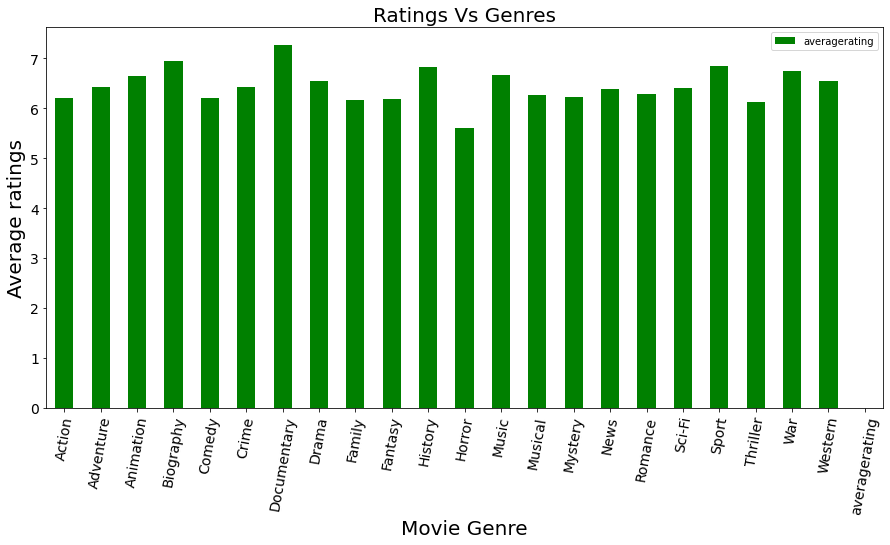

In [66]:
genres_rating.plot.bar(
    figsize=(15,7), 
    x="genres", 
    y="averagerating", 
    rot=80,  
    color='green',
    fontsize = 14);
plt.title("Ratings Vs Genres", fontsize=20)
plt.xlabel('Movie Genre', fontsize=20)
plt.ylabel('Average ratings', fontsize=20)

###### Interpretation: Documentary has the highest Ratings based on my finding, this can be influenced by voting and may not truly impact profitabilty  

In [67]:
#check any missing values
print ("Are there missing values? :",genres_rating.isnull().values.any())

Are there missing values? : True


In [68]:
# To drop any missing values
genres_rating.isnull().sum()

genres           0
averagerating    1
dtype: int64

## Which year had the highest production budget?

In [69]:
df_merge.columns

Index(['title', 'genres', 'averageRating', 'numVotes', 'domestic_gross',
       'year', 'production_budget', 'worldwide_gross', 'total_gross'],
      dtype='object')

In [70]:
df_merge.groupby('year')['production_budget']. mean().sort_values(ascending=False)

year
2010    1.058762e+08
2011    8.432850e+07
2012    6.722742e+07
2013    5.648871e+07
2014    4.810926e+07
2015    4.170989e+07
2016    3.633650e+07
2017    3.307131e+07
2018    2.907011e+07
Name: production_budget, dtype: float64

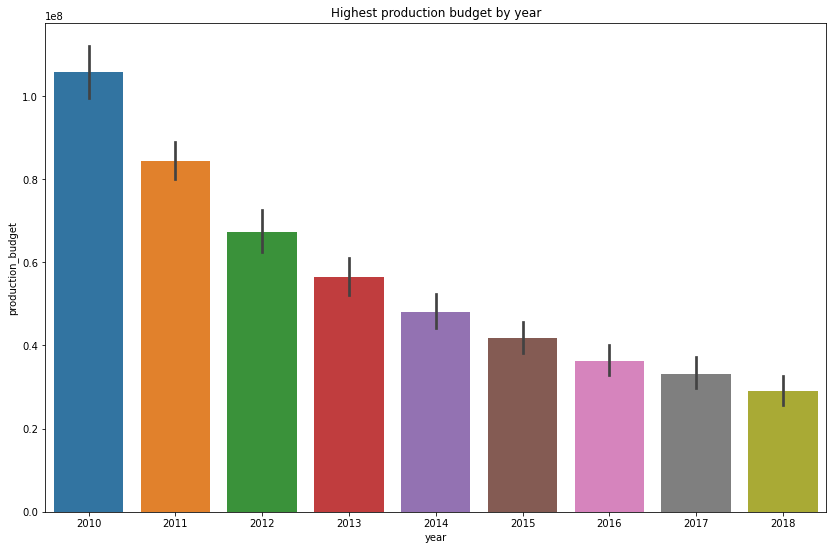

In [71]:
fig, ax =plt.subplots(figsize=(14,9))
sns.barplot(x='year', y='production_budget', data=df_merge)
plt.title("Highest production budget by year")
plt.show()

###### Interpretation: 2010 has the highest production budget by year

## Which year had the highest movie total gross by year?

In [72]:
df_merge.columns

Index(['title', 'genres', 'averageRating', 'numVotes', 'domestic_gross',
       'year', 'production_budget', 'worldwide_gross', 'total_gross'],
      dtype='object')

In [73]:
df_merge.groupby('year')['total_gross']. mean().sort_values(ascending=False)

year
2010    3.612968e+08
2011    2.553863e+08
2012    2.014953e+08
2013    1.876028e+08
2014    1.501207e+08
2015    1.467390e+08
2016    1.413141e+08
2017    1.365838e+08
2018    1.181253e+08
Name: total_gross, dtype: float64

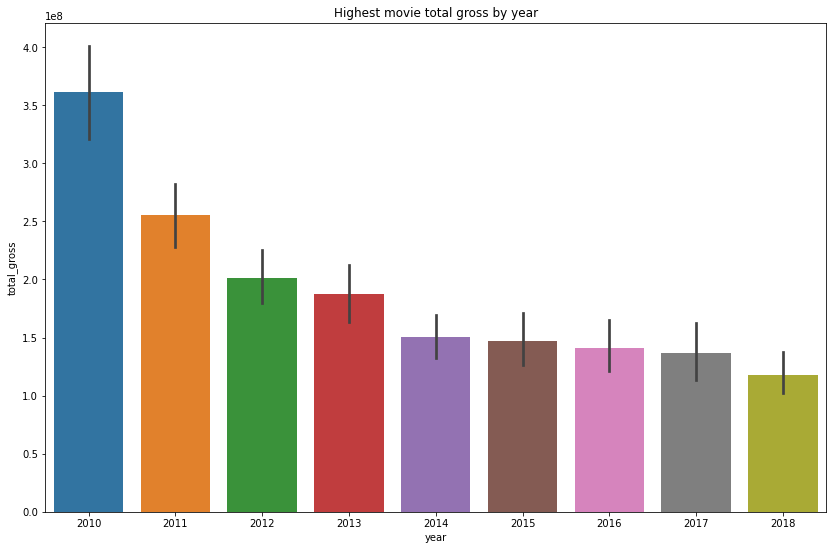

In [74]:
fig, ax =plt.subplots(figsize=(14,9))
sns.barplot(x='year', y='total_gross', data=df_merge)
plt.title("Highest movie total gross by year")
plt.show()

###### Interpretation: 2010 has the highest production budget by year

## Which year had the top rated movies by year?

In [75]:
df_merge.columns

Index(['title', 'genres', 'averageRating', 'numVotes', 'domestic_gross',
       'year', 'production_budget', 'worldwide_gross', 'total_gross'],
      dtype='object')

In [76]:
df_merge.groupby('year')['averageRating']. mean().sort_values(ascending=False)

year
2017    6.468012
2018    6.461210
2014    6.441880
2011    6.433799
2015    6.428846
2016    6.426617
2012    6.380780
2013    6.375549
2010    6.246025
Name: averageRating, dtype: float64

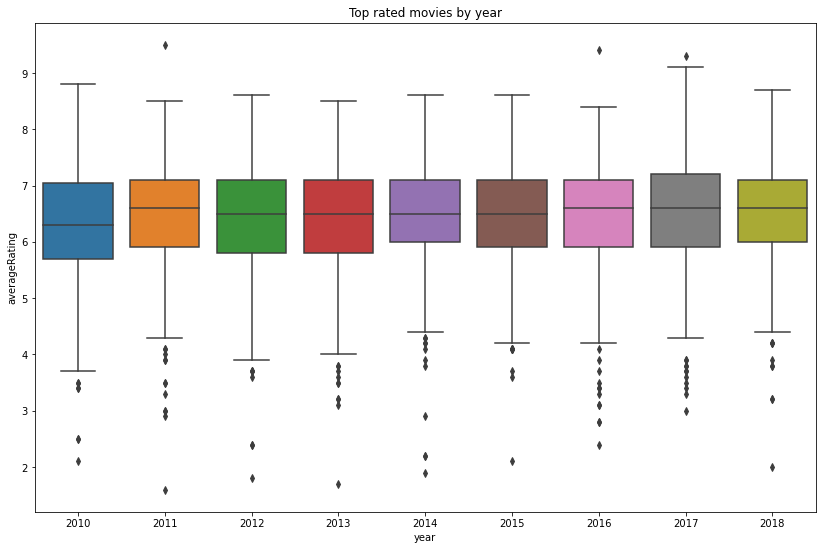

In [77]:
fig, ax =plt.subplots(figsize=(14,9))
sns.boxplot(x='year', y='averageRating', data=df_merge)
plt.title("Top rated movies by year")
plt.show()

###### Interpretation: Apparently 2017, has the highest ratings by year

## Data Anaysis

- Q1: Profitabililty when analysing production budget and return on investment?
- Q2: Percentage change in profitability if movie is published worldwide?
- Q3: Will changes in the worldwide gross by return on investment affect profitability?
- Q4: What type of genres has high Return on investment?

In [78]:
from matplotlib import ticker

In [79]:
# Creating a new column "return on investment" by substracting the "production_budget" from "total_gross"
ROI= df_merge.insert(5, column='ROI', value = df_merge['total_gross'] - df_merge['production_budget'])

In [80]:
df_merge.head(5)

,title,genres,averageRating,numVotes,domestic_gross,ROI,year,production_budget,worldwide_gross,total_gross
0,Avatar,"Action,Crime,Drama",7.1,18872,1100000.0,2.352445e+09,2016,425000000.0,2.776345e+09,2.777445e+09
1,Pirates of the Caribbean: On Stranger Tides,"Adventure,Drama,Romance",6.0,41597,744000.0,6.358079e+08,2012,410600000.0,1.045664e+09,1.046408e+09
2,Dark Phoenix,Drama,5.7,12,744000.0,-1.994936e+08,2012,350000000.0,1.497624e+08,1.505064e+08
3,Avengers: Age of Ultron,Drama,5.9,211,744000.0,1.073158e+09,2012,330600000.0,1.403014e+09,1.403758e+09
4,Star Wars Ep. VIII: The Last Jedi,"Adventure,Comedy,Drama",7.3,311974,58200000.0,1.057922e+09,2013,317000000.0,1.316722e+09,1.374922e+09


## Profitabililty when analysing production budget and return on investment

In [81]:
#Checking production budget effect on return on investment
df_merge.columns

Index(['title', 'genres', 'averageRating', 'numVotes', 'domestic_gross', 'ROI',
       'year', 'production_budget', 'worldwide_gross', 'total_gross'],
      dtype='object')

In [82]:
Budget_ROI=df_merge.groupby('production_budget')['ROI']. mean().sort_values(ascending=False)
Budget_ROI


production_budget
425000000.0    2.352445e+09
306000000.0    1.773611e+09
215000000.0    1.349134e+09
330600000.0    1.073158e+09
300000000.0    1.058530e+09
                   ...     
156000000.0   -3.317918e+07
46500000.0    -3.461486e+07
59500000.0    -4.930000e+07
49800000.0    -4.979390e+07
350000000.0   -1.994936e+08
Name: ROI, Length: 227, dtype: float64

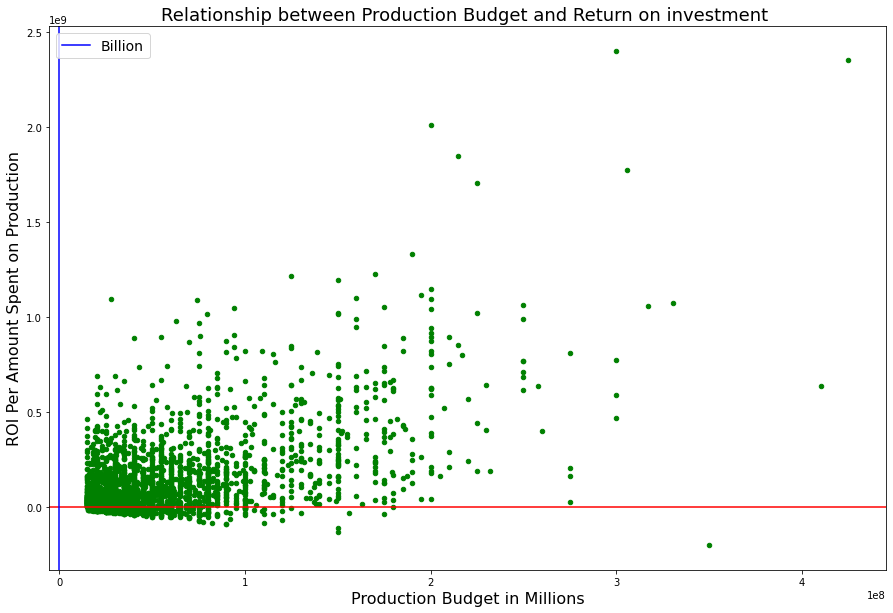

In [83]:
df_merge.plot.scatter(figsize=(15,10),x='production_budget',y='ROI', color='green')
plt.title('Relationship between Production Budget and Return on investment ', fontsize=18)
plt.xlabel('Production Budget in Millions', fontsize=16)
plt.ylabel('ROI Per Amount Spent on Production', fontsize=16)

plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.axvline(x = 22, color = 'b', label = 'Billion')
plt.legend(loc = 'upper left', prop={"size":14})

## Percentage change in profitability if movie is published worldwide?

In [84]:
df_merge.columns

Index(['title', 'genres', 'averageRating', 'numVotes', 'domestic_gross', 'ROI',
       'year', 'production_budget', 'worldwide_gross', 'total_gross'],
      dtype='object')

In [85]:
domestic_percentage = df_merge['domestic_gross'].sum() / df_merge['total_gross'].sum() * 100
worldwide_percentage = df_merge['worldwide_gross'].sum() / df_merge['total_gross'].sum() * 100
ROI_percentage = df_merge['total_gross'].sum()- df_merge['production_budget'].sum() * 100

In [86]:
df_merge.insert(5, column='ROI_percentage', value=ROI_percentage)

In [87]:
## Which year had the top profitable movies ?
df_merge[ df_merge["ROI"] == df_merge["ROI"].max()]

,title,genres,averageRating,numVotes,domestic_gross,ROI_percentage,ROI,year,production_budget,worldwide_gross,total_gross
6,Avengers: Infinity War,"Action,Adventure,Sci-Fi",6.9,620091,652300000.0,-1.597344e+13,2.400434e+09,2015,300000000.0,2.048134e+09,2.700434e+09


<ipython-input-88-63268efd98bc>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([" ", 'Domestic', 'Worldwide', " "], rotation=0, fontsize=16)


(0.0, 100.0)

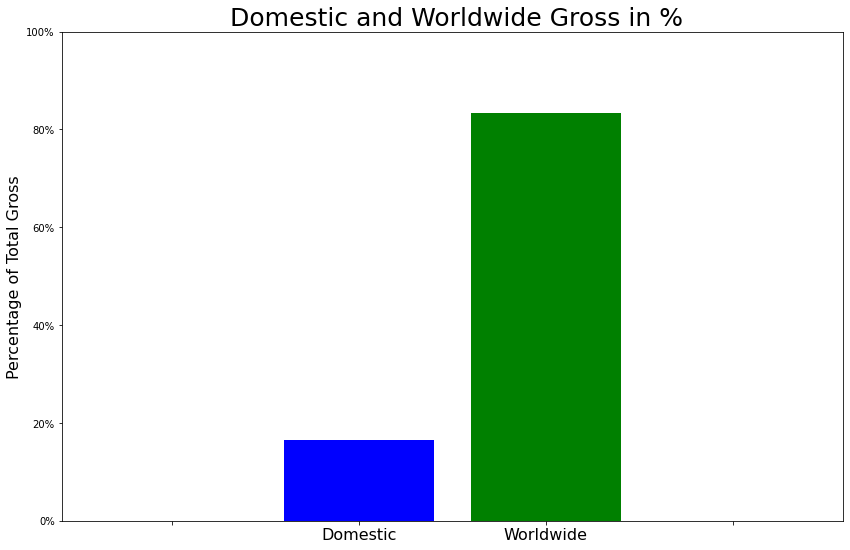

In [88]:
fig, ax = plt.subplots(figsize=(14, 9))

# Use plot() function to create a plot using above values
ax.bar(range(4), [0, domestic_percentage, worldwide_percentage, 0], color=["green", "blue"])
ax.set_xticklabels([" ", 'Domestic', 'Worldwide', " "], rotation=0, fontsize=16)
ax.set_xticks(range(4))
yticker = ticker.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(yticker)
# Add labels for x and y axes
ax.set_xlabel('')
ax.set_ylabel('Percentage of Total Gross', fontsize=16)

# Add a title for the plot
ax.set_title(' Domestic and Worldwide Gross in %', fontdict={"fontsize":25})
ax.set_ylim((0, 100))

## Comparing changes in the worldgross and return on investment

In [89]:
df_merge.columns

Index(['title', 'genres', 'averageRating', 'numVotes', 'domestic_gross',
       'ROI_percentage', 'ROI', 'year', 'production_budget', 'worldwide_gross',
       'total_gross'],
      dtype='object')

In [90]:
# years accordin
years_ROI = df_merge.groupby('year')['ROI']. mean().sort_values(ascending=False)
years_ROI

year
2010    2.554206e+08
2011    1.710578e+08
2012    1.342678e+08
2013    1.311141e+08
2015    1.050291e+08
2016    1.049776e+08
2017    1.035125e+08
2014    1.020115e+08
2018    8.905514e+07
Name: ROI, dtype: float64

''

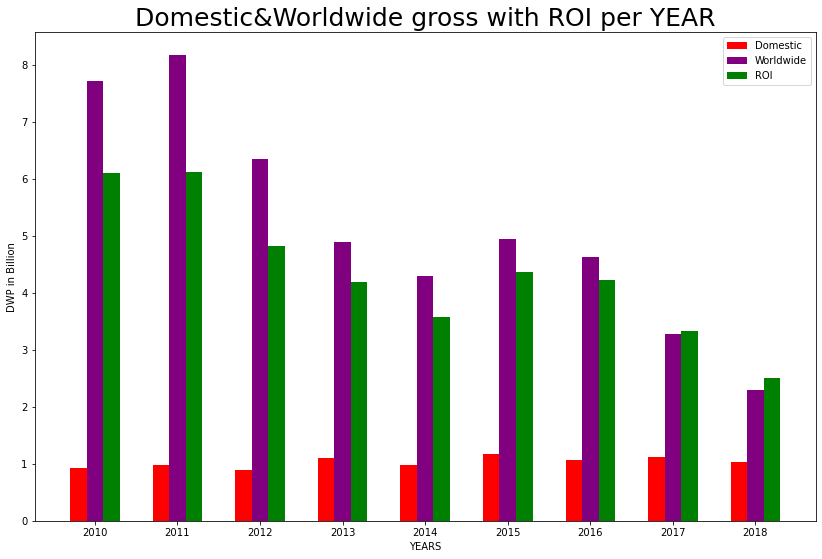

In [91]:
fig, ax = plt.subplots(figsize=(14, 9))

for year in range(2010,2019):
    _df = df_merge[df_merge["year"] == year]
 # Use plot() function to create a plot using above values  
    ax.bar([year - .2], _df["domestic_gross"].sum()/1e10, color="red", width=.2, label="Domestic")
    ax.bar([year], _df["worldwide_gross"].sum()/1e10, color="purple", width=.2, label="Worldwide ")
    ax.bar([year + .2], _df["ROI"].sum()/1e10, color="green", width=.2, label="Return On investment")

ax.set_xticks(range(2010, 2019))
# Add labels for x and y axes
ax.set_xlabel('YEARS')
ax.set_ylabel('DWP in Billion')

# Add a title for the plot
ax.set_title('Domestic&Worldwide gross with ROI per YEAR', fontdict={"fontsize":25})
ax.legend(["Domestic", "Worldwide", "ROI"], loc=1)
;

## What type of genres has high Return on investment?

In [92]:
df_merge.columns

Index(['title', 'genres', 'averageRating', 'numVotes', 'domestic_gross',
       'ROI_percentage', 'ROI', 'year', 'production_budget', 'worldwide_gross',
       'total_gross'],
      dtype='object')

In [93]:
df_genres.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'averagerating'],
      dtype='object')

In [94]:
df_genres['ROI'] = df_merge['ROI']

In [95]:
genres_ROI = []
for genre in df_genres.columns:
    genres_ROI.append((genre, df_genres[df_genres[genre]==1]['ROI'].mean()))
genres_ROI = pd.DataFrame(genres_ROI, columns=['genres', 'ROI']) 
genres_ROI

,genres,ROI
0,Action,1.738640e+08
1,Adventure,2.188339e+08
2,Animation,1.935469e+08
3,Biography,1.189335e+08
4,Comedy,1.286051e+08
5,Crime,1.456799e+08
6,Documentary,9.649496e+07
7,Drama,1.119001e+08
8,Family,1.688532e+08
9,Fantasy,1.671227e+08


In [96]:
#check any missing values
print ("Are there missing values? :",genres_ROI.isnull().values.any())

Are there missing values? : True


In [97]:
# To drop any missing values
genres_ROI.isnull().sum()

genres    0
ROI       2
dtype: int64

Text(0, 0.5, 'Return on investment in Billions')

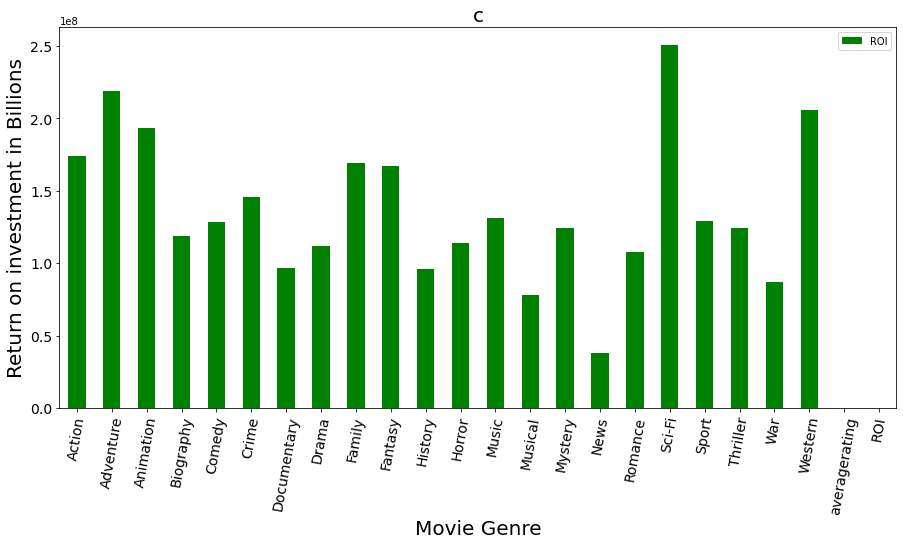

In [98]:
genres_ROI.plot.bar(
    figsize=(15,7), 
    x="genres", 
    y="ROI", 
    rot=80,  
    color='green',
    fontsize = 14);
plt.title("c", fontsize=20)
plt.xlabel('Movie Genre', fontsize=20)
plt.ylabel('Return on investment in Billions', fontsize=20)

## Recommendations
- This illustrates the relationship between the  production budget and the return on investment. it shows production budget and return on investment has a weak positive correlation meaning when production budget increase, the profit increases as well. Microsoft cannot achieved profitability based on this result because it is weak and unreliable. 

- From the barplot above between 2010 to 2019 we can see a positive value change of 60% in the worldwide gross bring about more positve increase in total gross as well. I can encourage Microsoft to not only publish movies only domestically but look into producing movies that will be viewed across world.

- From the barplot above we see return on investment were made signicantly increase only when the movies were published internationaly. 2010 recorded the highest profit, Highest production budget with the Highest number of votes even those the Ratings from 2010-2019 did not impact the profitablity.
Microsoft can't determine profitability on rating only domestically and internationally.

- In the exploratory section, from my findings 'Avengers: Infinity War' has the highest return on investment was 2.4 Billion with "Action,Adventure,Sci-Fi" genre, in the findings above we can "Sci-Fi" genres a likely to bring to profitable, Microsoft inc.can look into such genres in that catergories
